# Import Dataset

In [ ]:
!gdown https://drive.google.com/uc?id=1Kjt7cOPPJFT0pb4rVDDAE6gOMbK4ktYq &> /dev/null
!unzip final.zip &> /dev/null
!rm -r final.zip &> /dev/null

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,AveragePooling2D,Flatten,Dropout

# Preprocessing

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    """
    Creates the training and validation data generators

    Args:
        TRAINING_DIR (string): directory path containing the training images
        VALIDATION_DIR (string): directory path containing the testing/validation images

    Returns:
        train_generator, validation_generator - tuple containing the generators
    """
    train_datagen = ImageDataGenerator(rescale=1.0/255)

    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(224, 224))

    validation_datagen = ImageDataGenerator(rescale=1.0/255)
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                  batch_size=32,
                                                                  class_mode='categorical',
                                                                  target_size=(224, 224))
    return train_generator, validation_generator

# Paths
TRAINING_DIR = '/content/final/train'
VALIDATION_DIR = '/content/final/valid'

train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 14895 images belonging to 7 classes.
Found 4219 images belonging to 7 classes.


# Manual Architecture

In [ ]:
num_classes = len(train_generator.class_indices)

def create_model(num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(224, 224, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model

# Create model
model = create_model(num_classes)

# Train model
history = model.fit(train_generator,
                    epochs=1,
                    verbose=1,
                    validation_data=validation_generator)

466/466 [==============================] - 59s 103ms/step - loss: 1.5443 - accuracy: 0.4710 - val_loss: 3.0266 - val_accuracy: 0.3522


In [ ]:
model_json = model.to_json()

# Save the model to a JSON file
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

In [ ]:
from tensorflow.keras.models import load_model

saved_model_path = "./model.h5"

# YOUR CODE HERE
model.save(saved_model_path)

# Muat model Keras
model = load_model(model_path)

# Simpan model dalam format SavedModel
tf.saved_model.save(model, saved_model_dir)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 24.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
     

In [ ]:
!pip install nvidia-tensorrt

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tensorrt: filename=tensorrt-10.0.1-py2.py3-none-any.whl size=16331 sha256=0d5cae8407513c1bdc193f9212365617a3832cfec6316f715037b65c69e77ce7
  Stored in directory: /root/.cache/pip/wheels/43/0e/35/f5de9a100ae769ece311b8f653e493f7e49bbcc25dcdc92e27
  Created wheel for tensorrt-cu12: filename=tensorrt_cu12-10.0.1-py2.py3-none-any.whl size=17551 sha256=a0ae01cf98adb64ba77f4f3f6691072e9f3ea89e189f6b47aef158255d49e256
  Stored in directory: /root/.cache/pip/wheels/3d/65/7d/75f1bf55d7e57b0c82cb037d1d39d53851946315222eaf4c76
Successfully built tensorrt tensorrt-cu12


In [ ]:
# Langkah 3: Konversi model ke format TensorFlow.js
import tensorflowjs

!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model saved_model output_directory

2024-06-12 03:05:55.425994: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-12 03:05:58.948857: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2024-06-12 03:05:59.877778: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2024-06-12 03:05:59.878475: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2024-06-12 03:05:59.882730: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2024-06-12 03:06:02.131334: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2024-06-12 03:06:11.092712: W external/local_tsl/tsl/framework/cpu_a

In [ ]:
!zip -r submission.zip output_directory/*.bin output_directory/model.json

  adding: output_directory/group1-shard10of25.bin (deflated 8%)
  adding: output_directory/group1-shard11of25.bin (deflated 8%)
  adding: output_directory/group1-shard12of25.bin (deflated 8%)
  adding: output_directory/group1-shard13of25.bin (deflated 8%)
  adding: output_directory/group1-shard14of25.bin (deflated 8%)
  adding: output_directory/group1-shard15of25.bin (deflated 8%)
  adding: output_directory/group1-shard16of25.bin (deflated 8%)
  adding: output_directory/group1-shard17of25.bin (deflated 8%)
  adding: output_directory/group1-shard18of25.bin (deflated 8%)
  adding: output_directory/group1-shard19of25.bin (deflated 8%)
  adding: output_directory/group1-shard1of25.bin (deflated 8%)
  adding: output_directory/group1-shard20of25.bin (deflated 8%)
  adding: output_directory/group1-shard21of25.bin (deflated 8%)
  adding: output_directory/group1-shard22of25.bin (deflated 8%)
  adding: output_directory/group1-shard23of25.bin (deflated 8%)
  adding: output_directory/group1-shard24

#Pre-Trained ResNet50

In [ ]:
from tensorflow.keras.applications import DenseNet201

pre_trained_model = DenseNet201(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

freeze_index = None
for i,layer in enumerate(pre_trained_model.layers):
    if 'conv4' in layer._name:
        freeze_index = i
        break

for layer in pre_trained_model.layers[:freeze_index]:
    layer.trainable = False

x = pre_trained_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

model = tf.keras.models.Model(pre_trained_model.input, outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy' ,
                  metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,epochs=5,validation_data=validation_generator)

Epoch 1/5
466/466 [==============================] - 302s 419ms/step - loss: 1.0525 - accuracy: 0.6126 - val_loss: 0.5690 - val_accuracy: 0.8080
Epoch 2/5
466/466 [==============================] - 192s 412ms/step - loss: 0.4306 - accuracy: 0.8613 - val_loss: 0.3493 - val_accuracy: 0.8749
Epoch 3/5
466/466 [==============================] - 191s 410ms/step - loss: 0.2486 - accuracy: 0.9253 - val_loss: 0.3030 - val_accuracy: 0.9002
Epoch 4/5
466/466 [==============================] - 191s 410ms/step - loss: 0.1632 - accuracy: 0.9513 - val_loss: 0.2837 - val_accuracy: 0.9130
Epoch 5/5
466/466 [==============================] - 193s 413ms/step - loss: 0.1298 - accuracy: 0.9629 - val_loss: 0.3330 - val_accuracy: 0.9073


In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

print("kelas teren ughh:")
for class_label, index in train_generator.class_indices.items():
    print(f"{index}: {class_label}")

print("kelas validhhh ugh:")
for class_label, index in validation_generator.class_indices.items():
    print(f"{index}: {class_label}")

Found 14895 images belonging to 7 classes.
Found 4219 images belonging to 7 classes.
Class indices for train generator:
0: akiec
1: bcc
2: bkl
3: df
4: mel
5: nv
6: vasc
Class indices for validation generator:
0: akiec
1: bcc
2: bkl
3: df
4: mel
5: nv
6: vasc


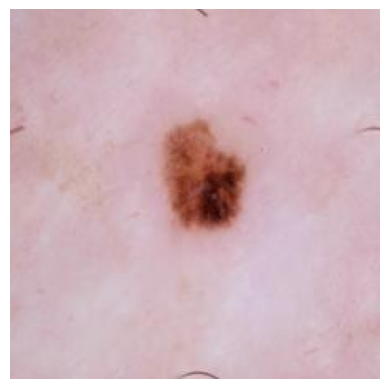

1/1 [==============================] - 0s 36ms/step
Predicted class: 4
Prediction probabilities: [[9.4854313e-06 3.1744696e-07 2.5893263e-05 2.7527285e-08 9.9995661e-01
  7.6280771e-06 3.4346780e-08]]


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input

def predict_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    return predicted_class, predictions

image_path = '/content/final/train/akiec/ISIC_0024418_jpg.rf.f2cf6c3663d55a9e8edcc267e43a3336.jpg'

display_image = Image.open(image_path)
plt.imshow(display_image)
plt.axis('off')
plt.show()

predicted_class, predictions = predict_image(image_path)
print(f'Predicted class: {predicted_class}')
print(f'Prediction probabilities: {predictions}')

Saving ISIC_0025452_jpg.rf.74ad2fe6e326165e82c0bff5846cecce.jpg to ISIC_0025452_jpg.rf.74ad2fe6e326165e82c0bff5846cecce.jpg


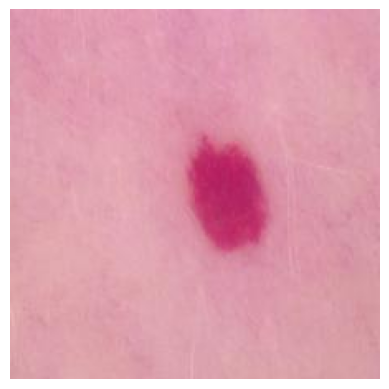

1/1 [==============================] - 0s 34ms/step
Predicted class: 6
Prediction probabilities: [[2.3752820e-15 5.5767339e-11 6.7133923e-11 6.0773735e-16 1.1945618e-09
  2.5877727e-16 1.0000000e+00]]


In [ ]:
from google.colab import files
from PIL import Image
import io
from tensorflow.keras.preprocessing import image

def predict_image(uploaded_image):
    img = Image.open(io.BytesIO(uploaded_image))
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    return predicted_class, predictions

uploaded = files.upload()
for fn in uploaded.keys():
    display_image = Image.open(io.BytesIO(uploaded[fn]))
    plt.imshow(display_image)
    plt.axis('off')
    plt.show()

    predicted_class, predictions = predict_image(uploaded[fn])
    print(f'Predicted class: {predicted_class}')
    print(f'Prediction probabilities: {predictions}')

# Pre-Trained InceptionV3


In [ ]:
from keras.applications import InceptionV3

pre_trained_model = InceptionV3(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

freeze_index = None
for i,layer in enumerate(pre_trained_model.layers):
    if 'conv4' in layer._name:
        freeze_index = i
        break

for layer in pre_trained_model.layers[:freeze_index]:
    layer.trainable = False

x = pre_trained_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

model = tf.keras.models.Model(pre_trained_model.input, outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Manual Architecture

In [ ]:
def create_model():
    base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
    base_model.trainable = False

    model = tf.keras.models.Sequential([
        base_model,
        Dense(32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(7, activation='softmax')
    ])

    return model
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_4 (Dense)             (None, 32)                16416     
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 7)                 903       
                                                                 
Total params: 14742439 (56.24 MB)
Trainable params: 27

In [ ]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:

steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 2


In [ ]:
history=model.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
149/149 [==============================] - 53s 324ms/step - loss: 1.6099 - accuracy: 0.3950 - val_loss: 1.1279 - val_accuracy: 0.5973
Epoch 2/20
149/149 [==============================] - 46s 307ms/step - loss: 1.2401 - accuracy: 0.5317 - val_loss: 1.0108 - val_accuracy: 0.6288
Epoch 3/20
149/149 [==============================] - 47s 317ms/step - loss: 1.0825 - accuracy: 0.5954 - val_loss: 0.9367 - val_accuracy: 0.6539
Epoch 4/20
149/149 [==============================] - 46s 307ms/step - loss: 0.9559 - accuracy: 0.6456 - val_loss: 0.8495 - val_accuracy: 0.6829
Epoch 5/20
149/149 [==============================] - 47s 312ms/step - loss: 0.8772 - accuracy: 0.6724 - val_loss: 0.8268 - val_accuracy: 0.6907
Epoch 6/20
149/149 [==============================] - 47s 316ms/step - loss: 0.8071 - accuracy: 0.7033 - val_loss: 0.7856 - val_accuracy: 0.7118
Epoch 7/20
149/149 [==============================] - 46s 309ms/step - loss: 0.7327 - accuracy: 0.7296 - val_loss: 0.7760 - val_ac

In [ ]:
num_classes = len(train_generator.class_indices)

def create_model(num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(224, 224, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model

# Create model
model = create_model(num_classes)

# Train model
history = model.fit(train_generator,
                    epochs=100,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/100
503/503 [==============================] - 51s 90ms/step - loss: 1.7710 - accuracy: 0.4208 - val_loss: 1.8472 - val_accuracy: 0.4051
Epoch 2/100
503/503 [==============================] - 44s 87ms/step - loss: 1.3969 - accuracy: 0.4791 - val_loss: 1.3766 - val_accuracy: 0.4719
Epoch 3/100
503/503 [==============================] - 45s 89ms/step - loss: 1.3057 - accuracy: 0.5144 - val_loss: 1.3084 - val_accuracy: 0.5164
Epoch 4/100
503/503 [==============================] - 44s 88ms/step - loss: 1.2154 - accuracy: 0.5363 - val_loss: 1.2999 - val_accuracy: 0.5312
Epoch 5/100
503/503 [==============================] - 46s 91ms/step - loss: 1.1430 - accuracy: 0.5711 - val_loss: 1.2627 - val_accuracy: 0.5212
Epoch 6/100
503/503 [==============================] - 44s 87ms/step - loss: 1.0782 - accuracy: 0.5886 - val_loss: 1.1807 - val_accuracy: 0.5470
Epoch 7/100
503/503 [==============================] - 45s 90ms/step - loss: 1.0257 - accuracy: 0.6103 - val_loss: 1.1762 - val_ac

### Train

In [ ]:
model = create_model()
history = model.fit(train_generator,
                    epochs=20,
                    verbose=1,
                    validation_data=validation_generator)

In [ ]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

plt.plot  ( epochs, acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot  ( epochs, loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

### Saved Model

In [ ]:
# Save the model
saved_model_path = "./model.h5"
model.save(saved_model_path)

In [ ]:
# Convert the Keras model to TFLite model
model = tf.keras.models.load_model(saved_model_path)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

### Convert to TFLITE

In [ ]:
!pip install tflite-support &> /dev/null
!pip uninstall tensorflow
!pip install tensorflow=="2.13.0" &> /dev/null

In [ ]:
from tflite_support.metadata_writers import writer_utils
from tflite_support.metadata_writers import image_classifier
from tflite_support import metadata

In [ ]:
# Paths for TFLite model and metadata
TFLITE_MODEL_PATH = 'converted_model.tflite'
MODEL_WITH_METADATA_PATH = 'model_with_metadata.tflite'

# Ingat untuk selalu diganti sama label penyakit yang ditrain!
labels = ["Atopic Dermatitis", "Monkeypox", "Psoriasis", "Tinea Ringworm", "Warts Molluscum"]

# Save labels to a temporary file
LABEL_FILE = 'labels.txt'
with open(LABEL_FILE, 'w') as f:
    for label in labels:
        f.write(f"{label}\n")

# Create an ImageClassifierWriter with normalization options
writer = image_classifier.MetadataWriter.create_for_inference(
    model_buffer=writer_utils.load_file(TFLITE_MODEL_PATH),
    input_norm_mean=[127.5],  # Normalization mean
    input_norm_std=[127.5],   # Normalization std
    label_file_paths=[LABEL_FILE]
)

# Populate metadata in the model
model_with_metadata = writer.populate()

# Save the model with metadata
writer_utils.save_file(model_with_metadata, MODEL_WITH_METADATA_PATH)

# Verify the metadata
displayer = metadata.MetadataDisplayer.with_model_file(MODEL_WITH_METADATA_PATH)
print("Metadata populated:")
print(displayer.get_metadata_json())
print("Associated file(s) populated:")
print(displayer.get_packed_associated_file_list())

## RestNet MODEL

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
pretrained_model = ResNet50(include_top=False, input_shape=(150, 150, 3), weights='imagenet')
pretrained_model.trainable = False

resnet_model = Sequential()
resnet_model.add(pretrained_model)
resnet_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
resnet_model.add(MaxPooling2D())
resnet_model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
resnet_model.add(MaxPooling2D())
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(3, activation='softmax'))

resnet_model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

resnet_model.summary()

In [ ]:
epochs=2
history = resnet_model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs
)

In [ ]:
# Save the model
saved_model_path = "./model.h5"
model.save(saved_model_path)

In [ ]:
# Convert the Keras model to TFLite model
model = tf.keras.models.load_model(saved_model_path)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

In [ ]:
# Paths for TFLite model and metadata
TFLITE_MODEL_PATH = 'converted_model.tflite'
MODEL_WITH_METADATA_PATH = 'model_with_metadata.tflite'

# Labels
labels = ["Basal", "Benign", "Melanoma"]

# Save labels to a temporary file
LABEL_FILE = 'labels.txt'
with open(LABEL_FILE, 'w') as f:
    for label in labels:
        f.write(f"{label}\n")

# Create an ImageClassifierWriter with normalization options
writer = image_classifier.MetadataWriter.create_for_inference(
    model_buffer=writer_utils.load_file(TFLITE_MODEL_PATH),
    input_norm_mean=[127.5],  # Normalization mean
    input_norm_std=[127.5],   # Normalization std
    label_file_paths=[LABEL_FILE]
)

# Populate metadata in the model
model_with_metadata = writer.populate()

# Save the model with metadata
writer_utils.save_file(model_with_metadata, MODEL_WITH_METADATA_PATH)

# Verify the metadata
displayer = metadata.MetadataDisplayer.with_model_file(MODEL_WITH_METADATA_PATH)
print("Metadata populated:")
print(displayer.get_metadata_json())
print("Associated file(s) populated:")
print(displayer.get_packed_associated_file_list())